# Part 2 - Understanding FITS files and Plotting Astronomical Images using AstroPy


In today's tutorial you will be learning about FITS files, which are a common filetype used to store astronomical data. Over the course of this tutorial, you will explore how to:

- download data stored in online archives
- open FITS files using Python packages and load image data
- explore the header information store in an FITS file
- edit a FITS header
- combine multiple FITS files to create a 3-color image

Before working through today's notebook we suggest you read the following chapters in the textbook:

 - Data I/O (Ch 5)
 - Plotting Astronomical Images (Ch 7)

## Section 1: Working with FITS files

###  Downloading from an online archive

Let's begin by first accessing our data! For today's exercise we will be using data taken by the Las Cumbres Observatory (LCO) telescope network. This is the same telescope network that you will be using to acquire astronimcal data for the obervational portion of this program.

The LCO archive is open to the public and can be accessed by going to https://archive.lco.global.

For this activity, we will be using data from a very specific set of observations. To directly access this data, open up this [link](https://archive.lco.global/?reduction_level=91&request_id=2629603&start=2014-08-01%2000%3A00&end=2022-07-31%2023%3A59&public=true&limit=20) in a new tab in your browser.

Once there, check the three data files taken between **06:13 and 06:18 on Sept 1, 2021**. Next, click the dropdown arrow to access the download options and select a "zip with uncompressed files".

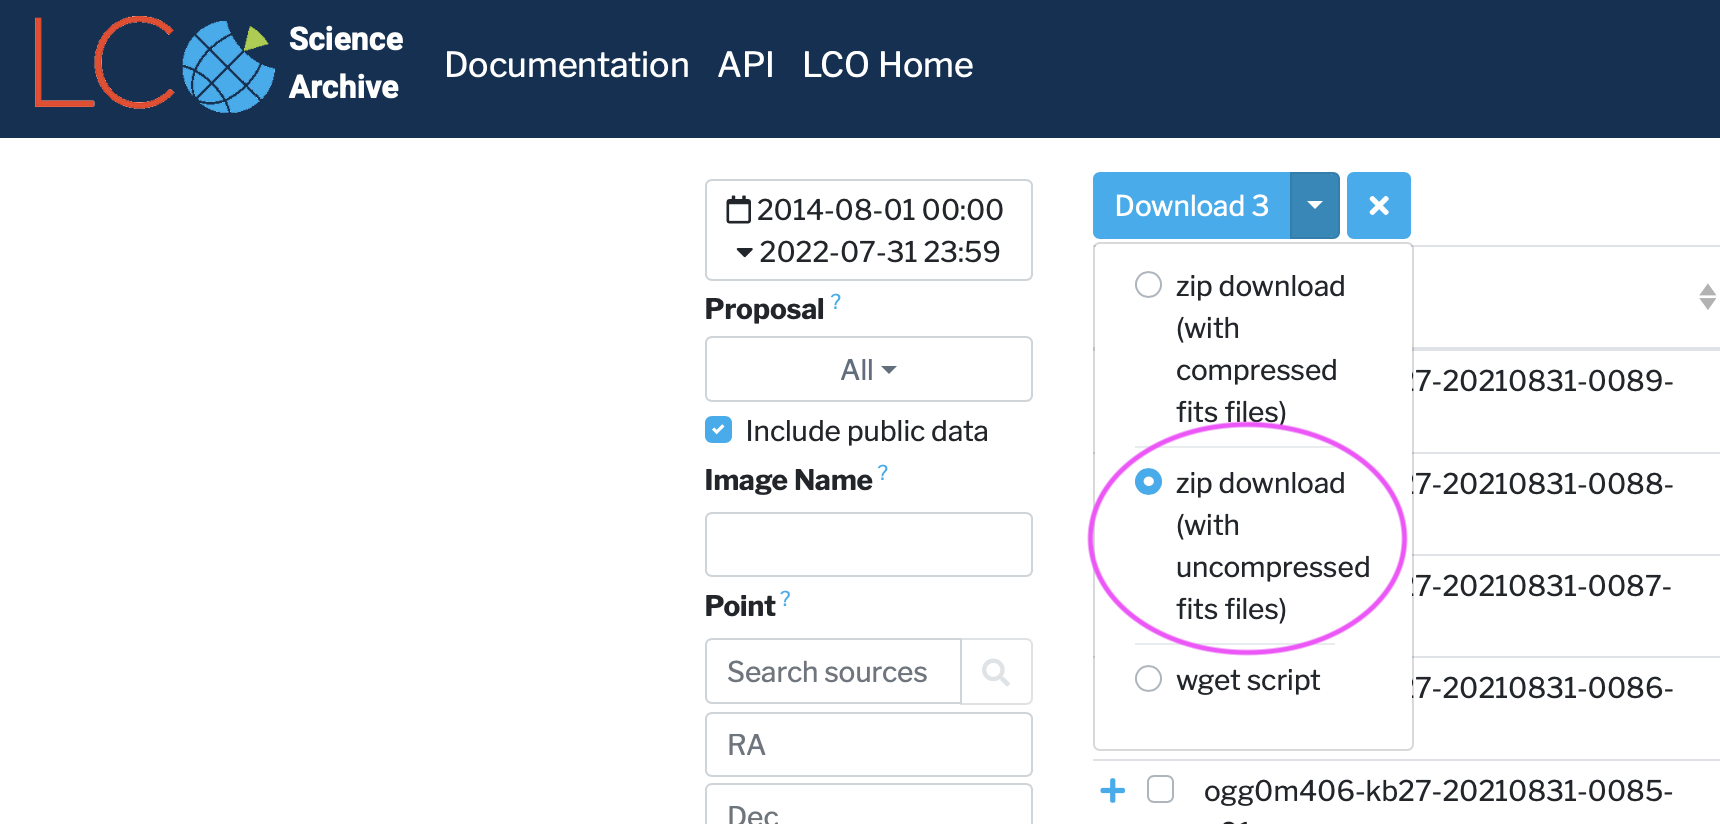

Finally, click to download the three data files and (once complete) shift these files into a folder titled `data` in the same directory as today's notebook and associated files are located.

#### Let's start working with the data!

Here, we begin by loading in some important packages that we'll be using:

In [1]:
from datetime import datetime
import numpy as np

# Set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.io import fits

### Opening FITS files and loading the image data

Let's open the FITS file to find out what it contains! Edit the cell below such that the variable "fits_1" is assigned the file name of one of the files you have downloaded today.

In [2]:
fits_1 = 'data/ogg0m406-kb27-20210831-0087-e91.fits'

Now let's open up this file and get some info on what the file contains:

In [3]:
hdu_list = fits.open(fits_1)

hdu_list.info()

Filename: data/ogg0m406-kb27-20210831-0087-e91.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  SCI           1 PrimaryHDU     260   (3054, 2042)   float32   
  1  CAT           1 BinTableHDU    118   622R x 37C   [D, D, D, D, K, K, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, K, D, D]   
  2  BPM           1 ImageHDU         9   (3054, 2042)   uint8   
  3  ERR           1 ImageHDU         9   (3054, 2042)   float32   


A FITS file is comprised of segments called **Header Data Units** (HDUs), where the first HDU is called the "Primary HDU", or "Primary Array". An HDU is the highest level component of the FITS file structure, consisting of a header and (typically) a data array or table.

A `hdulist`, like you see in the output above, behaves like a Python list, and each element maps to a HDU in the FITS file.

***

#### Q - How many HDUs does this FITS file have?

***

Ans.

Each HDU object has two important attributes: 

 - **data**, which behaves like a Numpy array, can be used to access the data
 - **header**, which behaves like a dictionary, can be used to access the header information which is information about the data itself 

`astropy.io.fits` provides a lot of flexibility for reading FITS files and headers, but most of the time the convenience functions are the easiest way to access the data. `fits.getdata()` reads only the data from a FITS file, but with the header=True keyword argument will also read the header.

Let's try this below:

In [4]:
data, header = fits.getdata(fits_1, header=True)

There is also a dedicated function for reading only the header, called `fits.getheader()`:

In [5]:
hdu_number = 0 # Primary HDU

fits.getheader(fits_1, hdu_number)

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 3054                                                  
NAXIS2  =                 2042                                                  
EXTEND  =                    T                                                  
DATADICV= 'LCOGT-DIC.FITS-0.11.0' / Version number of the data dictionary       
HDRVER  = 'LCOGT-HDR-1.4.0'    / Version number of the headers                  
ORIGIN  = 'LCOGT   '           / Organization responsible for the data          
SITEID  = 'ogg     '           / ID code of the Observatory site                
SITE    = 'LCOGT node at Haleakala Observatory' / Site of the Observatory       
ENCID   = 'clma    '           / ID code of the Enclosure                       
ENCLOSUR= 'Clamshell-01'    

***

#### Q - Scroll through the header above. What types of information does this header contain? Why might headers be important for astronomers to include in their datafiles?

***

Ans.

Because `getdata()` can get both the data and the header, it's a very useful command to remember! Since the primary HDU of a FITS file must contain image data, the data is now stored in a numpy array. The header is stored in an object that acts like a standard Python dictionary.

We can access individual header keywords using standard item notation in Python. For example, if we are curious about where the data was acquired, we can use the `SITE` card.

In [6]:
header["SITE"]

'LCOGT node at Haleakala Observatory'

This tells us this image was recorded at Haleakala Observatory.

We can also take a look at the data:

In [7]:
data.shape

(2042, 3054)

This tells us that the data is stored in a 2-dimensional array that is **2042 x 3054 pixels** in size.

Modifying data or header information in a FITS file object is easy. We can update existing header keywords and even _create_ new keywords like as follows:

In [8]:
now = datetime.now()

timenow = now.strftime("%H:%M:%S")

print(timenow)

header['MODIFIED'] = timenow  # adds a new keyword

09:02:53


In the cell below, write a statement that reads out the exposure time keyword. How long did the telescope integrate on this image?

In [9]:
#Your Code Here

As we stated above, HDU objects have two parts: a header and an array of data.

Let's begin to explore the data component of the primary HDU by plotting it into a figure.

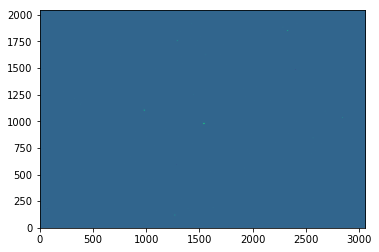

In [10]:
plt.imshow(data[:,:], origin='lower')

As you can see, the image looks not so remarkable.. it almost looks featureless!

For one, it's a little small. We can increase its generated size using the `rcParams` attribute.

Also.. while we observe a few stars the image looks quite faded. Astronomers will often apply _image normalization_ here to improve the visualization of data. In image processing, a normalization is a process that changes the range of pixel intensity values. 

Let's try it!

/Users/white/miniconda2/lib/python2.7/site-packages/astropy/visualization/stretch.py:115: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(values, out=values)
/Users/white/miniconda2/lib/python2.7/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


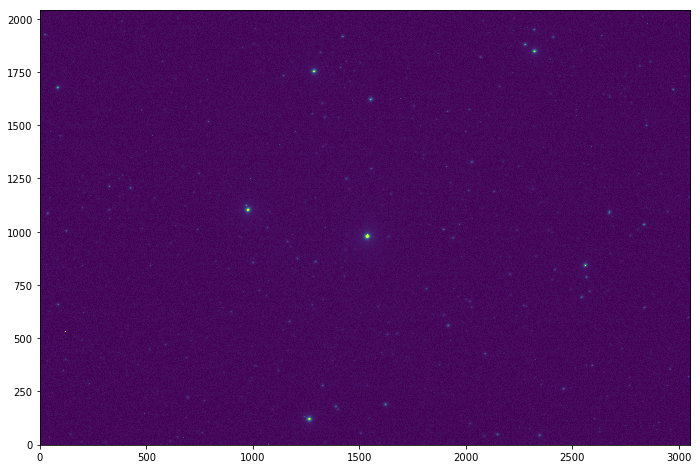

In [11]:
from astropy.visualization import (MinMaxInterval, SqrtStretch,
                                   ImageNormalize)

# Create an ImageNormalize object
norm = ImageNormalize(data[:,:], interval=MinMaxInterval(),
                      stretch=SqrtStretch())

plt.rcParams['figure.figsize'] = [12, 8]
plt.imshow(data[:,:], origin='lower', vmin=0.0, vmax=22318.7, norm=norm)

We can now observe many more features in the data!

Note that this is just a plot of an array, so the coordinates are just pixel coordinates at this stage. The data is stored with _longitude_ increasing to the _right_ (the opposite of the normal convention in astronomy).

Now let's save our changes by writing to a *new* fits file using the `writeto` process in AstroPy:

In [12]:
fits.writeto('my_modified_file.fits', data, header, overwrite=True)

Now let's load in the new file and readout the header. You should see a new card created that has a value assigned with the current time and date!

In [13]:
fits.getheader('my_modified_file.fits', hdu_number)

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 3054                                                  
NAXIS2  =                 2042                                                  
DATADICV= 'LCOGT-DIC.FITS-0.11.0' / Version number of the data dictionary       
HDRVER  = 'LCOGT-HDR-1.4.0'    / Version number of the headers                  
ORIGIN  = 'LCOGT   '           / Organization responsible for the data          
SITEID  = 'ogg     '           / ID code of the Observatory site                
SITE    = 'LCOGT node at Haleakala Observatory' / Site of the Observatory       
ENCID   = 'clma    '           / ID code of the Enclosure                       
ENCLOSUR= 'Clamshell-01'       / Building containing Telescope                  
TELID   = '0m4b    '        

We can use AstroPy to also get some statistics about our image:

In [14]:
print('Min:', np.min(data))
print('Max:', np.max(data))
print('Mean:', np.mean(data))
print('Stdev:', np.std(data))

('Min:', -52109.523)
('Max:', 107315.92)
('Mean:', 21.564049)
('Stdev:', 544.9472)


***

#### Q - What do you think these statistics reference? For example, the cell above outputs a min value and a max value. What do these min and max values represent?

***

Ans.

### Plotting out the Data

We can also use Python to visualize our astronomical images in different ways. For example, we notice in the above image a number of stars. We can slice our image in such a way that we select out only a small region of the above image and plot that out.



select out a row or column of data that passes through a star and plot out a histogram of this data sub-set.

for features in the image by collapsing it along one axis and plotting out a histogram. to do this we'll be first using `ndarray.flatten()` to collapse the data and returna  1D numpy array. Then, to make a histogram we will use `matplotlib.pyplot.hist()`.

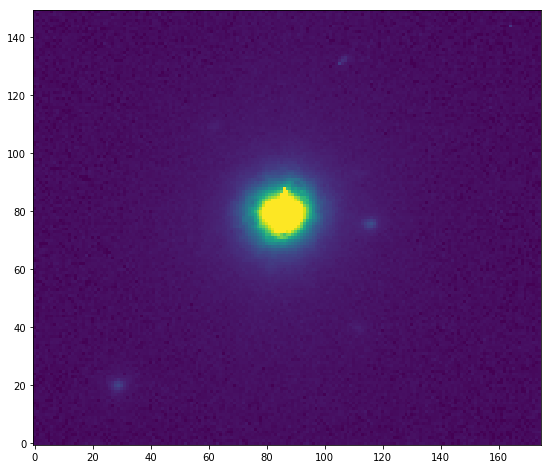

In [15]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.imshow(data[900:1050,1450:1625], origin='lower', vmin=0.0, vmax=22318.7, norm=norm)

We can also slice out a single row of data which passes through the center of the star and plot this out in 1D:

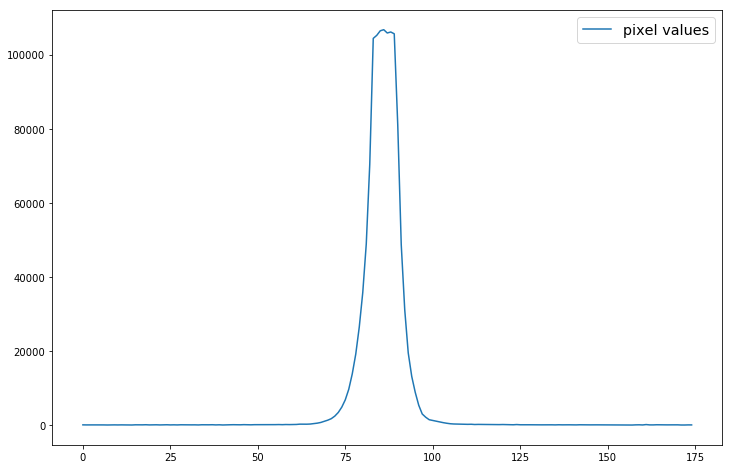

In [16]:
plt.plot(data[980, 1450:1625], label="pixel values")
plt.legend(fontsize="x-large")

Can you write a block of code that produces a similar line plot passing through one of the fainter stars in the image? Write this code block below.

In [17]:
#Your Code Here

## World Coordinate Systems in FITS files

Also stored within the header of a FITS file is information regarding the image's **world coordinate system** or **WCS**. World Coordinate Systems describe the geometric transformations between one set of coordinates and another. A common application (as seen in this dataset) is to map the pixels in an image onto the celestial sphere. Another common application is to map pixels to wavelength in a spectrum.

`astropy.wcs` contains utilities for managing World Coordinate System (WCS) transformations defined in several elaborate FITS WCS standard conventions. These transformations work both forward (from pixel to world) and backward (from world to pixel). Let's explore that a bit here. 

Let's begin by first loading in `astropy.wcs`:

In [18]:
from astropy.wcs import WCS

Now let's load in the WCS information stored in the header of the FITS file:

In [19]:
wcs = WCS(header)

We can then print out this information to get a better idea of the coordinate system used in our image:

In [20]:
print(wcs)

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 303.03560562400003  38.356249643600002  
CRPIX : 1527.5  1021.5  
CD1_1 CD1_2  : -3.4380525122800001e-06  0.00015852448527300001  
CD2_1 CD2_2  : -0.00015852448527300001  -3.4380525122800001e-06  
NAXIS : 3054  2042


It's important to unpack this information! Here's what these values mean:

 - **CTYPE**: The TYPE of coordinate system. Here, it is Right Ascension (R.A.) and Declination (Dec). You can learn more about R.A. and Dec as a coordinate system [here](https://skyandtelescope.org/astronomy-resources/right-ascension-declination-celestial-coordinates/).
 - **CRPIX**: The reference value pixel
 - **CRVAL**: The R.A. and Dec values for the reference pixel
 - **CD values**: These values represent the values that comprise a linear transformation matrix. This matrix tells the computer how the coordinate system axes are oriented in relation to the array axes.
 
 
 Together these values allow astronomer to make the transformation between array/pixel coordinates to astronomical coordinates. More information on WCS and related keywords can be found [here](https://fits.gsfc.nasa.gov/standard40/fits_standard40aa-le.pdf).
 
 So now let's load in the WCS to our image so that the vertical and horizontal axes are properly labeled.

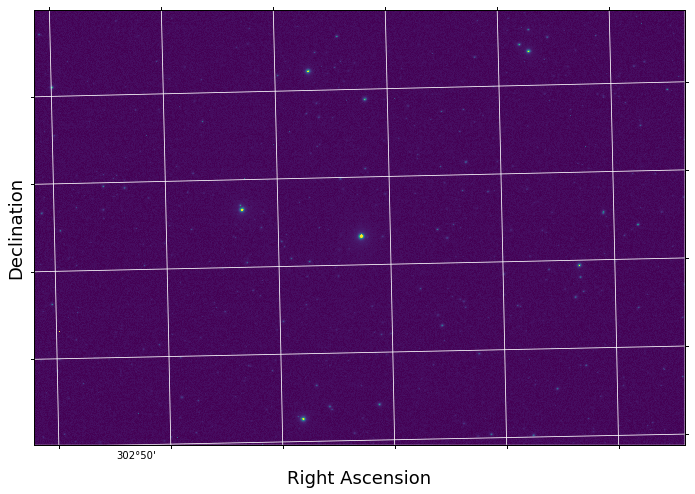

In [27]:
plt.clf()
ax = plt.subplot(projection=wcs)
plt.imshow(data, origin='lower', vmin=0.0, vmax=22318.7, norm=norm)
plt.grid(color='white', ls='solid')
ax.set_xlabel('Right Ascension', fontsize=18)
ax.set_ylabel('Declination', fontsize=18)
plt.show()

We can also overlay grid lines in white which show the grid of the WCS:

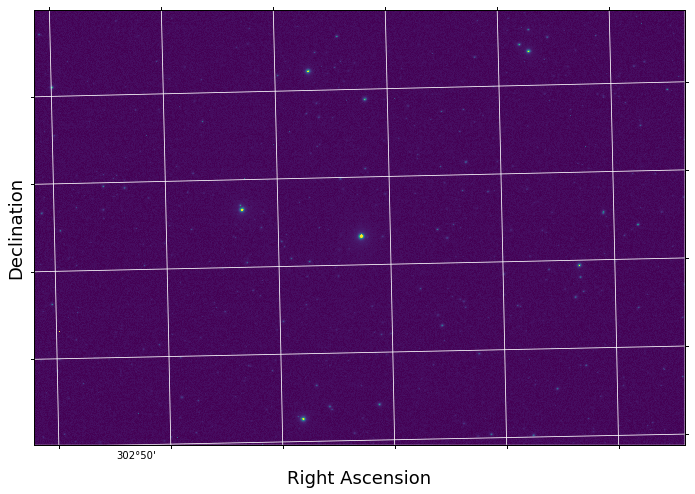

In [28]:
ax = plt.subplot(projection=wcs)
plt.imshow(data, origin='lower', vmin=0.0, vmax=22318.7, norm=norm)
plt.grid(color='white', ls='solid')
ax.set_xlabel('Right Ascension', fontsize=18)
ax.set_ylabel('Declination', fontsize=18)

Indeed, there is lots that can be done with `astropy.wcs` and `matplotlib` in terms of creating really complex and rich figures of astronomical data for publications. More information on editing and controlling a figures axes/ticks/labels can be found [here]("https://docs.astropy.org/en/stable/visualization/wcsaxes/ticks_labels_grid.html).

You can even try editing this notebook to incorporate some of the plotting techniques in that tutorial using this dataset!

## Making a 3-Color Images from Astronomical Data

Satellite and spacecraft images are not visual color photographs but pictorial presentations of measured data. Image collection systems measure electromagnetic radiation in different bands of the electromagnetic spectrum (i.e. radio, infrared, visible, ultraviolet, X-ray, gamma ray). The color images you often see are in most cases assembled from separate black & white images taken through special types of filters. To produce one color image, three separate images are collected through a red, a green, and a blue filter. The three images are then combined with image analysis software into one color image.

For this reason, astronomical images are not “true color” images – they do not represent visually accurate color – they use “false” colors or more accurately “representative” colors. True color would be an attempt to reproduce a visually accurate color. False color is an arbitrary selection of colors to represent some characteristic in the image, such as photon intensity, energy, temperature and chemical composition/distribution, or features such as shock waves and magnetic fields.

In this section we're going to be exploring how astronomers construct 3-color images using data from the Sloan Digital Sky Survey (SDSS). You'll find in the `sdss_data/` folder three FITS files. Let's begin by first loading in this data:

In [ ]:
i_data, i_header = fits.getdata('data/reprojected_sdss_i.fits', header=True)
r_data, r_header = fits.getdata('data/reprojected_sdss_r.fits', header=True)
g_data, g_header = fits.getdata('data/reprojected_sdss_g.fits', header=True)

Write out a code block below which reads in the header of this file. What type of coordinate system does this FITS file use?

In [ ]:
#Your Code Here

Next we're going to load in the `make_lupton_rgb` convenience function from `astropy.visualization`.

In [ ]:
from astropy.visualization import make_lupton_rgb

[Lupton et al. (2004)](https://ui.adsabs.harvard.edu/abs/2004PASP..116..133L/abstract) describe an “optimal” algorithm for producing red-green- blue composite images from three separate high-dynamic range arrays. This method is implemented in `make_lupton_rgb` as a convenience wrapper function and an associated set of classes to provide alternate scalings.

The next step is to then use this function to produce a 3-color RBG image from the *i*, *r*, and *g* filters data and display it using `matplotlib`.

In [ ]:
rgb_default = make_lupton_rgb(i_data, r_data, g_data, filename="ngc6976-default.jpeg")
ax2 = plt.subplot(projection=wcs)
plt.imshow(rgb_default, origin='lower')

We can also modify the scaling when computing the RGB image to allow for fainter features of the galaxies to show up better:

In [ ]:
rgb = make_lupton_rgb(i_data, r_data, g_data, Q=10, stretch=0.5, filename="ngc6976.jpeg")
plt.imshow(rgb, origin='lower')

Note: this image is now saved in this tutorial's main directory as `"ngc6976.jpeg"`. Go take a look!

As a final step - in the cell below, right some code that re-plots this image using the WCS in the header to assign the axes.

In [ ]:
#Your Code Here

That's it for today! Congrats on successfully completing Part 2 of our workshop's AstroPy FITS tutorial! 